In [1]:
%matplotlib inline

from modsim import *

In [2]:
bees = System(t0 = 0, 
                t_end = 180,
                adult_pop0 = 15000,
                eggs_pop0 = 0,
                larvae_pop0 = 0,
                hatch_time = .33, 
                mature_time = .05556,
                birth_rate = .4,
                death_rate = .05,
                larvae_death_rate = .15,
                swarm_size = 40000)

bees

,value
t0,0.00000
t_end,180.00000
adult_pop0,15000.00000
eggs_pop0,0.00000
larvae_pop0,0.00000
hatch_time,0.33000
mature_time,0.05556
birth_rate,0.40000
death_rate,0.05000
larvae_death_rate,0.15000


In [3]:
def Var_birth_death_rate(system,t):
    if 1<t<45:
        system.birth_rate=0
        system.death_rate=0
    if 46<t<106:
        system.birth_rate=200
        system.death_rate=0
    if 107<t<258:
        system.birth_rate=0
        system.death_rate=0
    if 259<t<314:
        system.birth_rate=0
        system.death_rate=0
    if 315<t<360:
        system.birth_rate=0
        system.death_rate=0
    
        

In [4]:
def Var_birth_death_rate1(system,t):
    if 1<t<45:
        births=0
        system.death_rate=.05
    if 46<t<106:
        births=200
        system.death_rate=.05
    if 107<t<258:
        births=818
        system.death_rate=.05
    if 259<t<314:
        births= 200
        system.death_rate=.05
    if 315<t<360:
        births=0
        system.death_rate=.05

In [5]:
run_simulation(bees,Var_birth_death_rate)
bees.adults

NameError: name 'run_simulation' is not defined

In [6]:
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(system.adults, 'bo-', label='adults')
    plot(system.eggs, 'ro-', label='eggs')
    plot(system.larvae, 'go-', label='larvae') 
    decorate(xlabel='Day', 
             ylabel='bee population',
             title=title)

In [7]:
run_simulation(bees,Var_birth_death_rate)
plot_results(bees)

NameError: name 'run_simulation' is not defined

In [8]:
bees = System(t0 = 0, 
                t_end = 365,
                adult_pop0 = 40000,
                eggs_pop0 = 0,
                larvae_pop0 = 0,
                hatch_time = .33, 
                mature_time = .05556,
                birth_rate = .4,
                death_rate = .05,
                larvae_death_rate = 0.1,
                swarm_size = 40000,
                births = 0)

bees

,value
t0,0.00000
t_end,365.00000
adult_pop0,40000.00000
eggs_pop0,0.00000
larvae_pop0,0.00000
hatch_time,0.33000
mature_time,0.05556
birth_rate,0.40000
death_rate,0.05000
larvae_death_rate,0.10000


In [9]:
def Var_birth_death_rate1(system,t):
    if 1<t<30:   #jan
        system.birth_rate=0
        system.death_rate=.001
    if 31<t<60: #feb
        system.birth_rate=0
        system.death_rate=.003
    if 61<t<90:   #mar
        system.birth_rate=.028
        system.death_rate=.01
    if 91<t<120:   #apr
        system.birth_rate=.042
        system.death_rate=.02
    if 121<t<150:   #may
        system.birth_rate=.05
        system.death_rate=.03
    if 151<t<181:   #jun
        system.birth_rate=.065
        system.death_rate=.03
    if 181<t<210:   #jul
        system.birth_rate=.075
        system.death_rate=.035
    if 211<t<240:   #aug
        system.birth_rate=.065
        system.death_rate=.04
    if 241<t<270:   #sep
        system.birth_rate=.051
        system.death_rate=.045
    if 271<t<300:   #oct
        system.birth_rate=.042
        system.death_rate=.04
    if 301<t<330:   #nov
        system.birth_rate=.028
        system.death_rate=.03
    if 331<t<365:   #dec
        system.birth_rate=0
        system.death_rate=.003

In [10]:
def run_simulation(system,birth_death):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    eggs = TimeSeries()
    eggs[system.t0] = system.eggs_pop0
    
    larvae = TimeSeries()
    larvae[system.t0] = system.larvae_pop0
    
    adults = TimeSeries()
    adults[system.t0] = system.adult_pop0
    
    for t in linrange(system.t0, system.t_end):
        #birth_death(system,t)
        births = system.birth_rate * adults[t]
        adult_deaths = system.death_rate * adults[t]
        larvae_deaths = system.death_rate * larvae[t]
        new_larvae = system.hatch_time * eggs[t]
        new_adults = system.mature_time * larvae[t]
        
        eggs[t+1] = eggs[t] + births - new_larvae
        larvae[t+1] = larvae[t] + new_larvae - new_adults - larvae_deaths
        adults[t+1] = adults[t] + new_adults - adult_deaths
        
    system.adults = adults
    system.eggs = eggs
    system.larvae = larvae

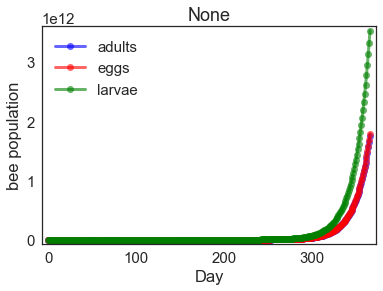

In [11]:
bees.adult_pop0 = 1000
run_simulation(bees,Var_birth_death_rate1)
plot_results(bees)

In [12]:
bees = System(t0 = 0, 
                t_end = 365,
                adult_pop0 = 40000,
                eggs_pop0 = 0,
                larvae_pop0 = 0,
                hatch_time = .33, 
                #mature_time = .05556,
                mature_time = .2,
                birth_rate = .4,
                death_rate = .05,
                larvae_death_rate = 0.01,
                swarm_size = 30000,
                births=0,
                deaths=0)

bees

,value
t0,0.00
t_end,365.00
adult_pop0,40000.00
eggs_pop0,0.00
larvae_pop0,0.00
hatch_time,0.33
mature_time,0.20
birth_rate,0.40
death_rate,0.05
larvae_death_rate,0.01


In [13]:
def swarm(system):
    if adults[t+1]>system.swarm_size:
        adults[t+1]=.5*(adults[t] + new_adults - adult_deaths)
    else:
        adults[t+1] = adults[t] + new_adults - adult_deaths

In [18]:
def Var_birth_death_rate2(system,t):
    if 1<t<30:   #jan
        system.births=0
        system.birth_rate=0
        system.death_rate=.001
    if 31<t<60: #feb
        system.births=0
        system.birth_rate=0
        system.death_rate=.003
    if 61<t<90:   #mar
        system.births=420
        system.birth_rate=.028
        system.death_rate=.01
    if 91<t<120:   #apr
        system.births=630
        system.birth_rate=.042
        system.death_rate=.02
    if 121<t<150:   #may
        system.births=750
        system.birth_rate=.05
        system.death_rate=.03
    if 151<t<181:   #jun
        system.births=975
        system.birth_rate=.062
        system.death_rate=.03
    if 181<t<210:   #jul
        system.births=1125
        system.birth_rate=.075
        system.death_rate=.035
    if 211<t<240:   #aug
        system.births=975
        system.birth_rate=.065
        system.death_rate=.037
    if 241<t<270:   #sep
        system.births=765
        system.birth_rate=.051
        system.death_rate=.042
    if 271<t<300:   #oct
        system.births=630
        system.birth_rate=.042
        system.death_rate=.04
    if 301<t<330:   #nov
        system.births=420
        system.birth_rate=.028
        system.death_rate=.03
    if 331<t<365:   #dec
        system.births=0
        system.birth_rate=0
        system.death_rate=.003

In [19]:
def Var_birth_death_rate3(system,t):
    for t in linrange(0,365, 10) :
        system.deaths= 1+1*np.sin(t*.0086071*2)
        system.births= 10+10*np.sin((365-t)*.0086071*2)
        #pop= births-deaths
        #plot(t, pop, 'b-')

In [20]:
def run_simulation1(system,birth_death):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    eggs = TimeSeries()
    eggs[system.t0] = system.eggs_pop0
    
    larvae = TimeSeries()
    larvae[system.t0] = system.larvae_pop0
    
    adults = TimeSeries()
    adults[system.t0] = system.adult_pop0
    
    for t in linrange(system.t0, system.t_end):
        birth_death(system,t)
        #if system.births<system.birth_rate*adults[t]:
        #    births= system.births
        #else:
        #    births=system.birth_rate*adults[t]
        births = system.birth_rate * adults[t]
        adult_deaths = system.death_rate * adults[t]
        #larvae_deaths = system.death_rate * larvae[t]
        new_larvae = system.hatch_time * eggs[t]
        new_adults = system.mature_time * larvae[t]
        
        eggs[t+1] = eggs[t] + system.births - new_larvae
        larvae[t+1] = larvae[t] + new_larvae - new_adults
        adults[t+1] = adults[t] + new_adults - system.deaths
        
        if adults[t+1]>system.swarm_size:
            adults[t+1]=.5*(adults[t] + new_adults - adult_deaths)
        else:
            adults[t+1] = adults[t] + new_adults - adult_deaths
    
    
        
    system.adults = adults
    system.eggs = eggs
    system.larvae = larvae

Saving figure to file BeeSimulation2.png


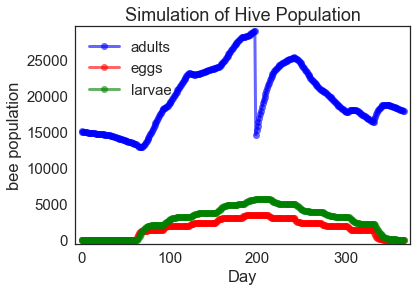

In [21]:
bees.adult_pop0 = 15000
run_simulation1(bees,Var_birth_death_rate2)
plot_results(bees,title='Simulation of Hive Population')
savefig('BeeSimulation2.png')

##### 